In [24]:
from sklearn.datasets import load_diabetes
import pandas as pd
import warnings

In [25]:
warnings.filterwarnings('ignore')

In [26]:
# Load the diabetes dataset
diabetes_sklearn = load_diabetes()

In [27]:
# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

print(diabetes_df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape of Sklearn Diabetes Data: (442, 11)


In [28]:
X=diabetes_df.drop(columns=['target'],axis=1)
y=diabetes_df[['target']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

<Axes: >

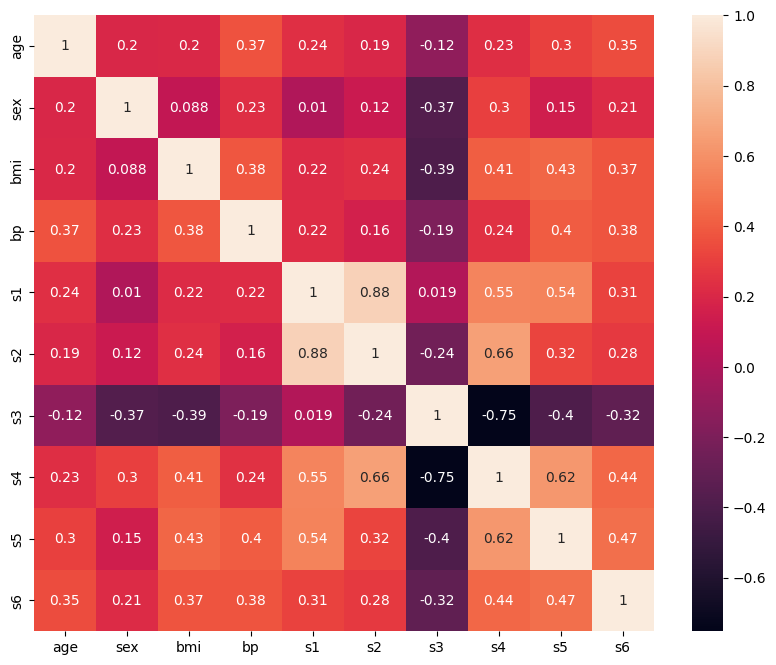

In [31]:
# correlation
# X_train.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [32]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

#### Hyper Parameter Tuning

In [33]:
param_grid = {
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter':['best','random'],
    'criterion': ['squared_error', 'absolute_error','friedman_mse']
}

In [34]:
from sklearn.model_selection import GridSearchCV
regressor=DecisionTreeRegressor()

In [35]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [36]:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


In [37]:
y_pred=grid_search.predict(X_test)

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3756325827065048
48.62256022842072
3903.039671396437


In [43]:
best_model=DecisionTreeRegressor(criterion='friedman_mse', max_depth= 3, max_features='log2', splitter='best')

In [44]:
best_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='log2')

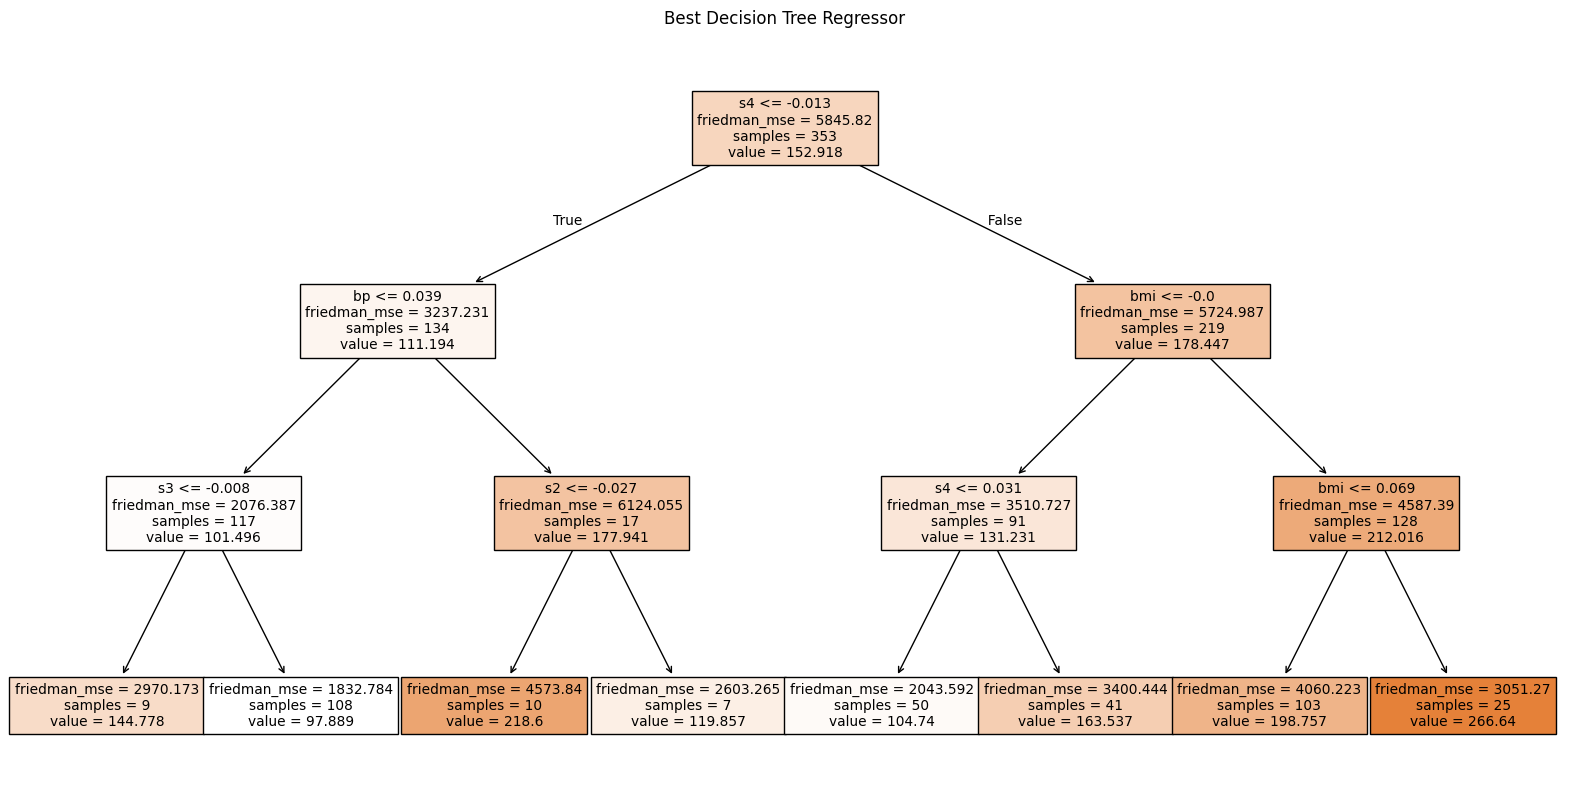

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns)
plt.title("Best Decision Tree Regressor")
plt.show()